### 확률적 경사 하강법 [SGD, Stochastic Gradient Descent]

Gradient descent이란 손실(cost)를 줄이는 알고리즘으로 미분값(기울기)가 최소가 되는 점(minima)을 찾아 알맞은 가중치(weight)를 찾는다

경사 하강법은 크게 3단계로 구분할 수 있다
1. 시작점의 기울기를 계산
2. 어느 방향으로 이동할지 결정, 보폭(learning rate)만큼 이동
3. 위 과정을 반복해 최소값에 근접

**그럼 확률적 경사 하강법은 무엇인가?**

전체 데이터의 손실을 계산하기엔 너무 많은 연산이 필요함으로 전체 데이터(batch)대신 일부 데이터(Mini-batch)의 손실을 계산해 연산량을 줄여 속도를 높인다.

여러번 반복할 경우 batch 처리한 결과와 수렴하고 Local Minima에 빠지지 않고 더 좋은 방향으로 수렴할 가능성도 높다.


아래 코드는 SGD를 직접 구현한 코드이다.

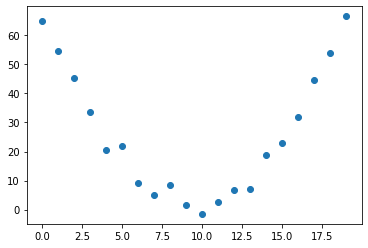

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

time = torch.arange(0, 20).float()
speed = torch.randn(20)*3 + 0.75*(time - 9.5)**2 + 1
plt.scatter(time, speed)

$F(x)=ax^2+bx+c$ 의 함수

In [2]:
def f(t, params):
    a, b, c = params
    return a*(t**2) + (b*t) + c

**Step 2 : 파라미터 초기화**

파라미터를 임의의 값으로 초기화하고 requires_grad_메서드를 사용해 파이토치가 파라미터의 그레이디언트를 추적할 수 있도록 함

In [3]:
params = torch.randn(3).requires_grad_()

**Step 3 : 예측**

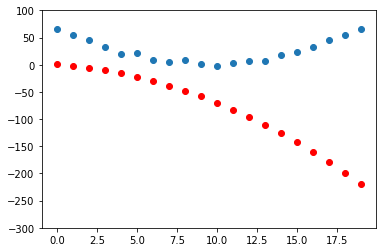

In [4]:
def show_preds(preds, ax=None):
    if ax is None: ax = plt.subplots()[1]
    n_preds = preds.detach().numpy()
    ax.scatter(time, speed)
    ax.scatter(time, n_preds, color='red')
    ax.set_ylim(-300,100)
    
preds = f(time, params)
show_preds(preds)

**Step 4 : 손실 측정**

In [5]:
def mse(preds, targets): return ((preds - targets)**2).mean().sqrt()

loss = mse(preds, speed); loss

tensor(130.8338, grad_fn=<SqrtBackward0>)

**Step 5 : 그레이디언트 계산**

In [6]:
loss.backward()
params.grad
params.grad * 1e-3
params

tensor([-0.5025, -2.0131,  0.4810], requires_grad=True)

**Step 6 : 가중치를 한 단계 갱신하기**

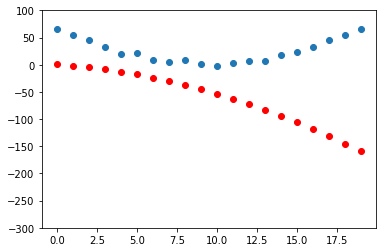

In [7]:
params.data -= 1e-3 * params.grad.data
params.grad = None
preds = f(time, params)
mse(preds, speed)
show_preds(preds)

**Step 7 : 반복**

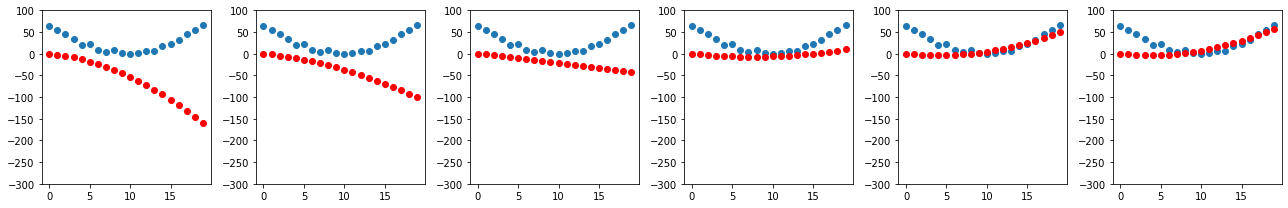

In [8]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= 1e-3 * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

_, axs = plt.subplots(1, 6, figsize=(18, 3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()